In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


data_path = "CarPrice_Assignment.csv"  
df = pd.read_csv(data_path)

print(df.head())
print(df.info())


   car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          front       88.6  ...         130   
1  convertible        rwd          front       88.6  ...         130   
2    hatchback        rwd          front       94.5  ...         152   
3        sedan        fwd          front       99.8  ...         109   
4        sedan        4wd          front       99.4  ...         136   

   fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm citympg  \

In [7]:

null_values = df.isnull().sum()
null_percentage = (null_values / len(df)) * 100


print("\nMissing Values Percentage:\n", null_percentage[null_percentage > 0])



Missing Values Percentage:
 Series([], dtype: float64)


In [9]:
threshold = 40
df = df.drop(columns=null_percentage[null_percentage > threshold].index, axis=1)


In [11]:
df = df.dropna(thresh=int(len(df.columns) * 0.5))


In [12]:
df = df.drop(columns=['car_ID'], axis=1)


In [13]:
df['carCompany'] = df['CarName'].apply(lambda x: x.split(' ')[0].lower())
df = df.drop(columns=['CarName'])


In [14]:
corrections = {'maxda': 'mazda', 'porcshce': 'porsche', 'toyouta': 'toyota', 'vokswagen': 'volkswagen', 'vw': 'volkswagen'}
df['carCompany'] = df['carCompany'].replace(corrections)


In [15]:
df['car_stability'] = df['wheelbase'] / df['carlength']


In [16]:
correlated_columns = ['carlength', 'carwidth', 'curbweight', 'wheelbase', 'highwaympg', 'car_stability']
df = df.drop(columns=correlated_columns, axis=1)


In [17]:
df = pd.get_dummies(df, drop_first=True)


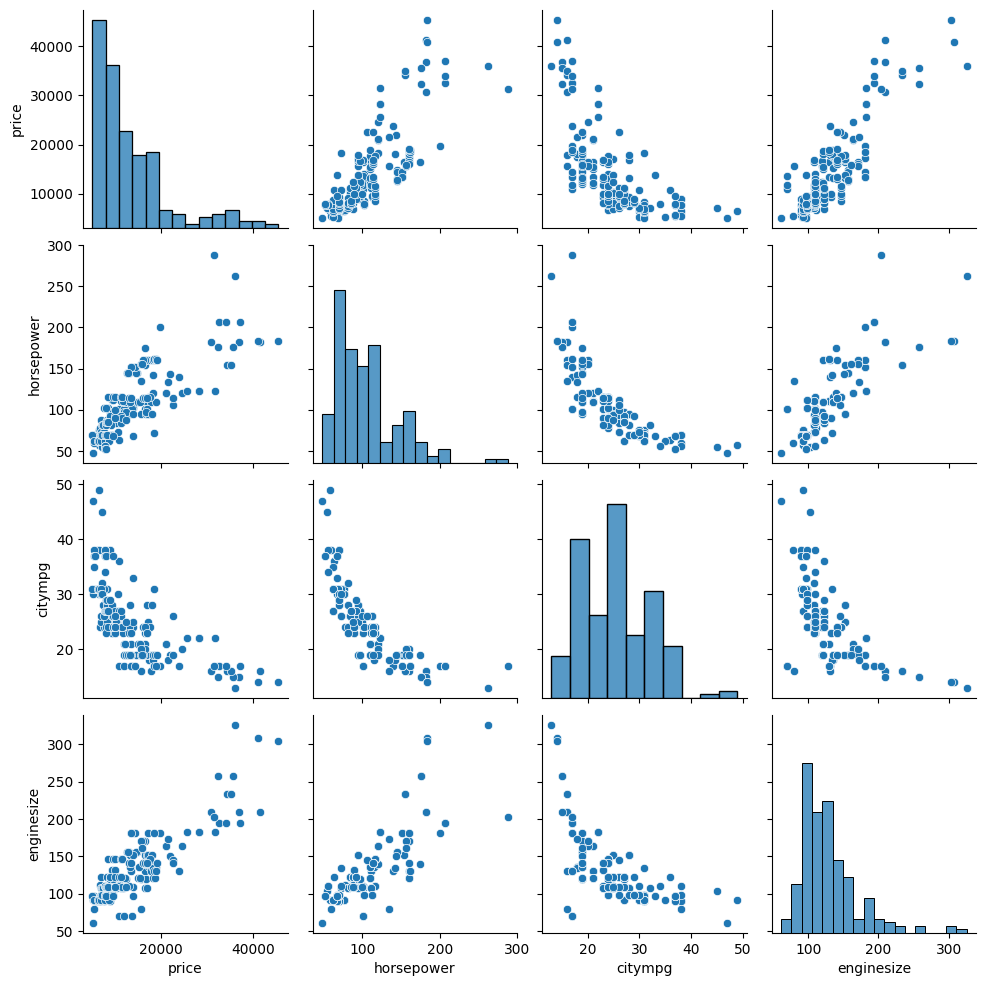

In [21]:
required_columns = ['price', 'horsepower', 'citympg', 'enginesize']
available_columns = [col for col in required_columns if col in df.columns]

if len(available_columns) == len(required_columns):
    sns.pairplot(df[available_columns])
    plt.savefig("pairplot.png", dpi=300, bbox_inches='tight')  # Save image
    plt.show()
else:
    print(f"Skipping pairplot: Missing columns {set(required_columns) - set(available_columns)}")


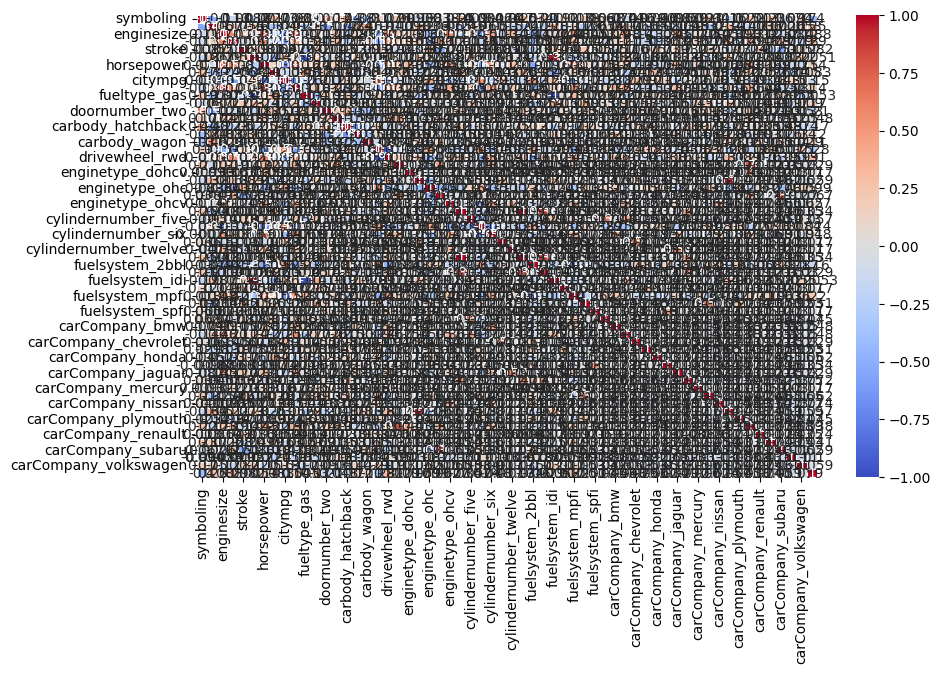

In [20]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.savefig("heatmap.png", dpi=300, bbox_inches='tight') 
plt.show()


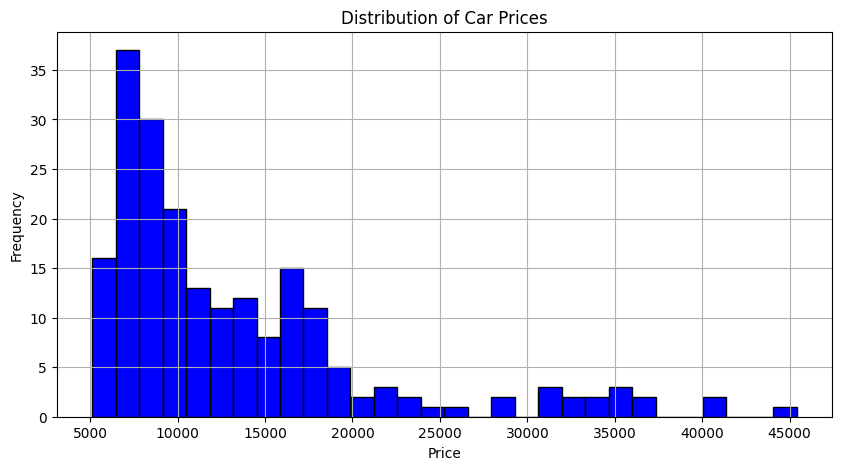

In [22]:
plt.figure(figsize=(10,5))
df['price'].hist(bins=30, color='blue', edgecolor='black')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Car Prices')
plt.savefig("histogram.png", dpi=300, bbox_inches='tight')  
plt.show()


In [27]:

if 'CarName' in df.columns:
    df['carCompany'] = df['CarName'].apply(lambda x: x.split(' ')[0].lower())
    df.drop(columns=['CarName'], inplace=True)  
else:
    print("CarName column not found in DataFrame!")


CarName column not found in DataFrame!


Available Columns:
 Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')


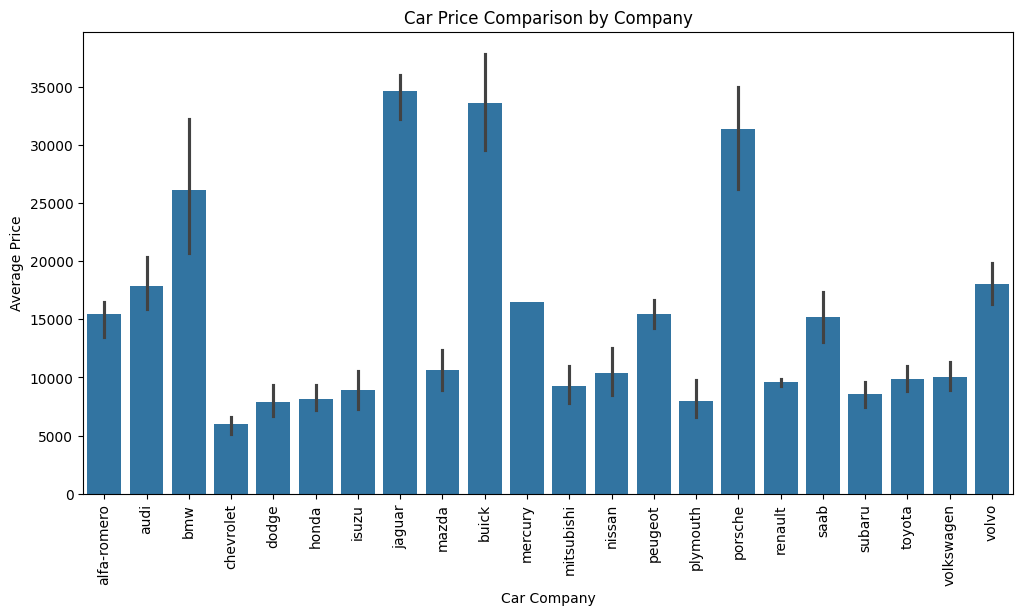

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


data_path = "CarPrice_Assignment.csv"  
df = pd.read_csv(data_path)


print("Available Columns:\n", df.columns)


if 'CarName' in df.columns:
    df['carCompany'] = df['CarName'].apply(lambda x: x.split(' ')[0].lower())  # Extract car brand
    df.drop(columns=['CarName'], inplace=True)  
else:
    print("CarName column not found in DataFrame!")


corrections = {
    'maxda': 'mazda', 'porcshce': 'porsche', 'toyouta': 'toyota',
    'vokswagen': 'volkswagen', 'vw': 'volkswagen'
}
df['carCompany'] = df['carCompany'].replace(corrections)

if 'carCompany' in df.columns and 'price' in df.columns:
    plt.figure(figsize=(12,6))
    sns.barplot(x=df['carCompany'], y=df['price'])
    plt.xticks(rotation=90)
    plt.xlabel('Car Company')
    plt.ylabel('Average Price')
    plt.title('Car Price Comparison by Company')
    plt.show()
else:
    print("Missing 'carCompany' or 'price' column, unable to generate chart.")
